Part I: skip-gram

In [168]:
import numpy as np
import re

text = '''Lamine Yamal, va arribar amb 7 anys al planter de La Masia, procedent del petit club CF la Torreta. Aviat va ser considerat una de les millors promeses de l'acadèmia.

Encara que va ser inclòs en l'equip Juvenil A -ja per sobre de la seva edat- per a la temporada 2022-23, va ser seleccionat per Xavi per entrenar amb el primer equip amb altres joves a principis de setembre del 2022. Malgrat que encara no ha signat el seu primer contracte professional amb el club, Lamine Yamal sembla ser un dels membres del planter que més ha impressionat el tècnic català.

Va debutar amb el primer equip el 29 d'abril del 2023, substituint Gavi al minut 83 en la victòria per 4-0 contra el Reial Betis a la Lliga, convertint-se en el jugador més jove en debutar amb el primer equip del FC Barcelona amb 15 anys, 9 mesos i 16 dies. El 14 de maig del 2023 va guanyar el seu primer títol amb el Barça, ja que va formar part de la plantilla que va guanyar la Lliga 2022-23.

Lamine Yamal va ser titular per primera vegada amb el club el 20 d'agost del 2023 en una victòria per 2-0 contra el Cadis a l'Estadi Olímpic Lluís Companys, convertint-se en el titular més jove del Barcelona a la Lliga amb 16 anys i 38 dies. La seva primera titularitat va ser rebuda amb una gran ovació per part de l'afició quan va ser substituït mancant cinc minuts per al final del partit. En la seva següent aparició com a titular, Lamine Yamal va ser nomenat home del partit després de contribuir als dos gols marcats per Gavi i Robert Lewandowski en la victòria per 4-3 davant el Vila-real CF el 28 d'agost de 2023. Amb 16 anys i 45 dies, es va convertir en el jugador més jove a donar una assistència en un partit de Lliga. Uns dies més tard, es convertiria amb el jugador més jove del Barça a debutar a la Lliga de Campions amb 16 anys i 68 dies, superant el registre de Vicky López (16 anys i 148 dies).

El 2 d'octubre, el FC Barcelona anunciava que Lamine Yamal renovava el seu contracte fins al 2026, amb una clàusula de rescissió de 1.000 milions d'euros. Dos dies després, va ser titular al seu primer partit de la Lliga de Campions contra el Porto, convertint-se en el jugador més jove en una alineació titular amb 16 anys i 83 dies. Lamine Yamal era tres dies més jove que Celestine Babayaro, que va establir el rècord el 1994. El 8 d'octubre del 2023, Lamine va marcar el seu primer gol amb el primer equip en un empat a domicili contra el Granada (2-2). Es va convertir en el golejador més jove del Barcelona i en el més jove de la història a marcar a la Lliga, amb 16 anys i 87 dies, batent tots dos rècords establerts per Ansu Fati i Fabrice Olinga respectivament. El 28 d'octubre de 2023, Lamine va fer la seva primera aparició a El Clàssic com a suplent en una derrota per 2-1 a casa, convertint-se en el jugador més jove en ser titular amb el Barcelona des d'Ansu Fati i batent el rècord de Vicenç Martínez el 1941.

El 4 de desembre de 2023, Lamine va rebre el trofeu inaugural Golden Boy The Youngest, que es concedeix al jugador més jove nominat per al premi Golden Boy. Posteriorment, el dia de la cerimònia, Lamine no va estar present a causa dels seus estudis.

L'11 de gener del 2024, Lamine va marcar contra l'Osasuna a la victòria per 2-0 del Barcelona a la semifinal de la Supercopa d'Espanya. Es va convertir en el jugador més jove, amb 16 anys i 182 dies, a marcar a la Supercopa. Lamine va jugar els últims 29 minuts de la final de la Supercopa d'Espanya contra el Reial Madrid el 14 de gener de 2024. Es va convertir en el jugador més jove a marcar a la Copa del Rei després de marcar al minut 32 contra l'Athletic Club en una eventual derrota per 4-2 a quarts de final.

L'11 de febrer de 2024, Lamine va marcar dos gols en l'empat a 3-3 contra el Granada CF i va ser triat millor jugador del partit. Per tant, es va convertir en el jugador més jove de la Lliga en marcar un doblet, batent el rècord anterior de Bojan Krkić el 2008, i el primer jugador a aconseguir aquest rècord amb menys de 17 anys. També es va convertir en el jugador més jove en assolir més de 10 gols i assistir contribucions a la Lliga amb 16 anys i 213 dies. El 21 de febrer es va convertir en el jugador més jove a jugar la fase eliminatòria de la Lliga de Campions, amb 16 anys i 223 dies, quan el Barcelona va jugar contra la SSC Napoli a la fase eliminatòria de la Fase eliminatòria de la Lliga de Campions, batent el rècord anterior del migcampista del Paris Saint-Germain FC Warren Zaïre-Emery.'''

# Pre-processament del text per obtenir el nostre vocabulari (tokenitzacio)
text = re.sub(r'[^\w\s]', '', text)
text = text.lower()
words = sorted(list(set(text.split())))
vocab_size = len(words)

token_to_idx = {}
idx_to_token = {}

for i, token in enumerate(words):
    token_to_idx[token] = i
    idx_to_token[i] = token

encode = lambda s: [token_to_idx[c] for c in s.split()]
decode = lambda l: ''.join([idx_to_token[i]+ " " for i in l])


print(decode(encode(text)))

lamine yamal va arribar amb 7 anys al planter de la masia procedent del petit club cf la torreta aviat va ser considerat una de les millors promeses de lacadèmia encara que va ser inclòs en lequip juvenil a ja per sobre de la seva edat per a la temporada 202223 va ser seleccionat per xavi per entrenar amb el primer equip amb altres joves a principis de setembre del 2022 malgrat que encara no ha signat el seu primer contracte professional amb el club lamine yamal sembla ser un dels membres del planter que més ha impressionat el tècnic català va debutar amb el primer equip el 29 dabril del 2023 substituint gavi al minut 83 en la victòria per 40 contra el reial betis a la lliga convertintse en el jugador més jove en debutar amb el primer equip del fc barcelona amb 15 anys 9 mesos i 16 dies el 14 de maig del 2023 va guanyar el seu primer títol amb el barça ja que va formar part de la plantilla que va guanyar la lliga 202223 lamine yamal va ser titular per primera vegada amb el club el 20 d

In [169]:
def one_hot_encode(token, size):
    vec = np.zeros(size)
    vec[token] = 1
    return vec

# Obtenim les dades preparades per entrenar
# Retorna la llista x, el token actual, i la llista y, el context
def get_train_data(text, window_size):
    data = encode(text)
    x = []
    y = []
    for i in range(len(data)):
        for j in range(1, window_size+1):
            if i - j >= 0:
                x.append(one_hot_encode(data[i], vocab_size))
                y.append(one_hot_encode(data[i - j], vocab_size))
            if i + j < len(data):
                x.append(one_hot_encode(data[i], vocab_size))
                y.append(one_hot_encode(data[i + j], vocab_size))
    return np.asarray(x), np.asarray(y)

X, Y = get_train_data(text, 2)
print(X.shape)
print(Y.shape)


(3386, 274)
(3386, 274)


In [170]:
# Inicalitzem el model
def initialitze_model(n_embd):
    model = {
        "w1": np.random.randn(vocab_size, n_embd),
        "w2": np.random.randn(n_embd, vocab_size)
    }
    return model

def softmax(X):
    exps = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def forward_pass(model, input):
    state = {}
    
    state["first_layer"] = input @ model["w1"]
    state["second_layer"] = state["first_layer"] @ model["w2"]
    state["z"] = softmax(state["second_layer"])
    return state

model = initialitze_model(20)
print(len(forward_pass(model, X)["z"][0]))

274


Seguint els apunts del David, implementació sparse per fer el forward_pass molt més eficient:

In [171]:
def get_train_data_sparse(text, window_size):
    data = encode(text)
    x = []
    y = []
    for i in range(len(data)):
        for j in range(1, window_size+1):
            if i - j >= 0:
                x.append(data[i])
                y.append(data[i - j])
            if i + j < len(data):
                x.append(data[i])
                y.append(data[i + j])
    return np.asarray(x), np.asarray(y)

Xsp, Ysp = get_train_data_sparse(text, 2)

def forward_pass_sp(model, input):
    state = {}

    state["first_layer"] = model["w1"][input]
    state["second_layer"] = state["first_layer"] @ model["w2"]
    state["z"] = softmax(state["second_layer"])
    return state

print(forward_pass_sp(model, Xsp)["z"].shape)

(3386, 274)


Derivació de backpropagation:

Tenim $L = -\sum_i y_ilog(y_{pred,i})$

$\frac{\partial L}{\partial a_{2,j}} = \sum_i \frac{\partial L}{\partial y_{pred,i}}·\frac{\partial y_{pred,i}}{\partial a_{2,j}}$

Ara, $\frac{\partial L}{\partial y_{pred,i}} = -\frac{y_{true,i}}{y_{pred,i}}$

$\frac{\partial y_{pred,i}}{\partial a_{2,j}} = y_{pred,j} - y_{pred,j}^2 = y_{pred,j}(1-y_{pred,j})$ si $i=j$

$\frac{\partial y_{pred,i}}{\partial a_{2,j}} = -y_{pred,i}·y_{pred,j}$ si $i \neq j$

Per tant, ajuntant-ho tot obtenim:

$\frac{\partial L}{\partial a_{2,j}} = \sum_i \frac{\partial L}{\partial y_{pred,i}}·\frac{\partial y_{pred,i}}{\partial a_{2,j}} = -y_{true,j}(1-y_{pred,j}) + \sum_{i \neq j}-y_{true,i}·y_{pred,j} = -y_{true,j}(1-y_{pred,j}) - y_{pred,j}(y_{true,j}-1) = y_{pred,j} - y_{true,j}$ 

La simplificació del sumatori ve donada al veure que el vector resultant és un vector amb el negatiu dels valors predeits a les posicions que no es corresponen amb el target actual i un 0 a la posició del target actual. Finalment, tenim que:
$\frac{\partial L}{\partial a_2} = y_{pred} - y_{true}$

Ara, aplicant la regla de la cadena:

$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2}·\frac{\partial a_2}{\partial W_2} = a_1^T·(y_{pred} - y_{true})$

$\frac{\partial L}{\partial a_1} = \frac{\partial L}{\partial a_2}·\frac{\partial a_2}{\partial a_1} = (y_{pred} - y_{true})·W_2^T$

$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_1}·\frac{\partial a_1}{\partial W_1} =  X^T·(y_{pred} - y_{true})·W_2^T$

In [172]:
# Backpropagation
def cross_entropy(pred, target):
    epsilon = 1e-12
    pred = np.clip(pred, epsilon, 1. - epsilon)
    target_probs = pred[np.arange(len(target)), target]
    
    return - np.sum(np.log(target_probs))

def backpropagation(model, input, target, learning_rate):
    state = forward_pass_sp(model, input)
    da2 = np.zeros_like(state["z"])
    np.copyto(da2, state["z"])
    da2[np.arange(da2.shape[0]), target] -= 1
    dw2 = state["first_layer"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = np.zeros_like(model["w1"])
    np.add.at(dw1, input, da1)
    model["w1"] -= learning_rate * dw1
    model["w2"] -= learning_rate * dw2
    return cross_entropy(state["z"], target)

# Backpropagation
def cross_entropy_reg(pred, target):
    epsilon = 1e-12 
    pred = np.clip(pred, epsilon, 1. - epsilon)
    return - np.sum(target * np.log(pred))

def backpropagation_reg(model, input, target, learning_rate):
    state = forward_pass(model, input)
    da2 = state["z"] - target
    dw2 = state["first_layer"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = input.T @ da1
    model["w1"] -= learning_rate * dw1
    model["w2"] -= learning_rate * dw2
    return cross_entropy_reg(state["z"], target)

Iteration 0: Loss = 45321.341547211254
Iteration 1000: Loss = 16201.576150268302
Iteration 2000: Loss = 13396.006907206078
Iteration 3000: Loss = 12144.414501975778
Iteration 4000: Loss = 11399.589027516471
Iteration 5000: Loss = 10894.317848701998
Iteration 6000: Loss = 10535.253305530245
Iteration 7000: Loss = 10272.458342841797
Iteration 8000: Loss = 10071.971725883486
Iteration 9000: Loss = 9913.579173098875
Training time: 256.05962324142456


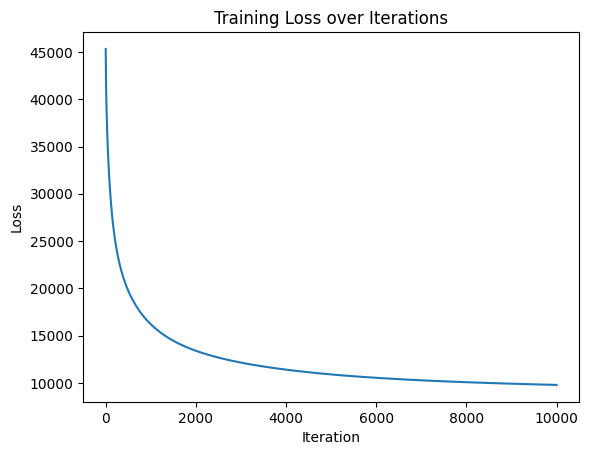

Final Loss: 9785.148947801019


In [173]:
import matplotlib.pyplot as plt
import time

n_iter = 10000
learning_rate = 0.0001
losses = []

start_time = time.time()
# Actualitzat per utilitzar la versió speedup
for i in range(n_iter):
    loss = backpropagation(model, Xsp, Ysp, learning_rate)
    losses.append(loss)
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss}")
        
print(f"Training time: {time.time() - start_time}")
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

print(f"Final Loss: {losses[-1]}")

In [174]:
def get_skipgram_embedding(model, word):
    vec = one_hot_encode(token_to_idx[word], len(token_to_idx))
    return vec @ model["w1"] 

lamine_embedding = get_skipgram_embedding(model, "lamine")
yamal_embedding = get_skipgram_embedding(model, "yamal")
principis_embedding = get_skipgram_embedding(model, "principis")

# Cosine similarity com a aproximació per veure la similitud entre els vectors
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

print(lamine_embedding)
print(yamal_embedding)
print(principis_embedding)

print("Similitud entre lamine i yamal: ", cosine_similarity(lamine_embedding, yamal_embedding))
print("Similitud entre lamine i principis: ", cosine_similarity(lamine_embedding, principis_embedding))

[ 0.01347023 -0.04630581 -0.97856734  0.97297771  1.34251926  1.22252889
 -0.89703838 -2.32917591  0.31546995  0.24495978 -0.05263298 -0.53092636
 -0.3457173   0.25552464  0.96850323  1.44469639 -1.14014925  0.74649432
 -0.73189346 -0.53218194]
[ 0.03009284 -1.017626   -0.32782196  0.42464313  0.77852343  1.2290444
 -1.26940284 -1.0834973  -0.09942309 -0.76470555  0.10133129  0.42141191
 -2.05107845  0.39290111  1.22315595  0.96480502 -0.90505394  0.39385281
 -0.45442555  0.49371976]
[-0.23121805  0.39252456  0.68080201  0.50545091  1.01589431 -0.35584959
  0.84499857 -0.7795351   1.41868342  0.59730283 -1.46161184 -0.76445415
  0.76908938  2.33534863 -1.0752937  -1.2053288   0.85594358  0.705348
 -0.20566952 -1.5114142 ]
Similitud entre lamine i yamal:  0.6888774909689438
Similitud entre lamine i principis:  0.04802318093660641


In [175]:
yamal = one_hot_encode(token_to_idx["yamal"], len(token_to_idx))
result = forward_pass(model, [yamal])
result = result["z"]
words = []
for word in (idx_to_token[id] for id in np.argsort(result)[::-1][0]):
    words.append(word)

print("Les 5 paraules més probables d'estar en el context de yamal son: ", words[::-1][:5])

Les 5 paraules més probables d'estar en el context de yamal son:  ['lamine', 'ser', 'va', 'dies', 'sembla']


Negative sampling

In [176]:
def get_train_data_negative(text, window_size, K, vocab_size):
    data = encode(text)
    x = []
    y = []
    negative_y = []
    for i in range(len(data)):
        for j in range(1, window_size+1):
            if i - j >= 0:
                x.append(data[i])
                y.append(data[i - j])
                negative_y.append([np.random.randint(vocab_size) for _ in range(K)])
            if i + j < len(data):
                x.append(data[i])
                y.append(data[i + j])
                negative_y.append([np.random.randint(vocab_size) for _ in range(K)])
        
    return np.asarray(x), np.asarray(y), np.asarray(negative_y)

Xn, Yn, negative_y = get_train_data_negative(text, 2, 10, vocab_size)
print(Xn.shape)
print(Yn.shape)
print(negative_y.shape)

(3386,)
(3386,)
(3386, 10)


In [177]:
def softmax_n(X, targets):
    # Masked softmax for negative sampling
    mask = np.zeros_like(X, dtype=bool)
    mask[np.arange(X.shape[0])[:, None], targets] = True
    
    X_masked = np.where(mask, X, -np.inf)
    X_max = np.max(X_masked, axis=1, keepdims=True)
    exps = np.exp(X_masked - X_max)
    sum_exps = np.sum(np.where(mask, exps, 0), axis=1, keepdims=True)
    softmax_values = exps / sum_exps
    
    return np.where(mask, softmax_values, 0)

def forward_pass_n(model, input, target, negative_target):
    state = {}

    state["first_layer"] = model["w1"][input]
    state["second_layer"] = state["first_layer"] @ model["w2"]
    # Sha de passar un X reduit per fer el negative sampling (només amb el positive sampling i els K exemples de més per banda)
    state["z"] = softmax_n(state["second_layer"], np.column_stack((target, negative_target)))
    return state

def cross_entropy_negative(pred, target):
    epsilon = 1e-12
    pred = np.clip(pred, epsilon, 1. - epsilon)
    target_probs = pred[np.arange(len(target)), target]
    
    return - np.sum(np.log(target_probs))

def backpropagation_negative(model, input, target, negative_target, learning_rate):
    state = forward_pass_n(model, input, target, negative_target)
    da2 = np.zeros_like(state["z"])
    np.copyto(da2, state["z"])
    da2[np.arange(da2.shape[0]), target] -= 1
    dw2 = state["first_layer"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = np.zeros_like(model["w1"])
    np.add.at(dw1, input, da1)
    model["w1"] -= learning_rate * dw1
    model["w2"] -= learning_rate * dw2
    return cross_entropy_negative(state["z"], target)
    
model2 = initialitze_model(20)
state = forward_pass_n(model2, Xn, Yn, negative_y)
print(state["z"].shape)

(3386, 274)


Iteration 0: Loss = 24873.45181585807
Iteration 1000: Loss = 5928.1810716073705
Iteration 2000: Loss = 3737.8053156668684
Iteration 3000: Loss = 2904.398811897055
Iteration 4000: Loss = 2471.5435185971082
Iteration 5000: Loss = 2192.1614500826954
Iteration 6000: Loss = 1983.7556903849932
Iteration 7000: Loss = 1817.7072129422315
Iteration 8000: Loss = 1682.32392422482
Iteration 9000: Loss = 1570.9975055910531
Training time: 338.48813939094543


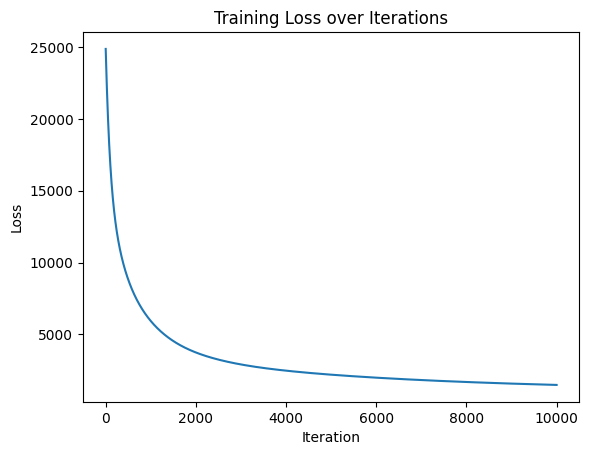

Final Loss: 1479.3220615545724


In [178]:
import matplotlib.pyplot as plt
import time

n_iter = 10000
learning_rate = 0.0001
losses = []

start_time = time.time()
# Actualitzat per utilitzar la versió speedup
for i in range(n_iter):
    loss = backpropagation_negative(model2, Xn, Yn, negative_y, learning_rate)
    losses.append(loss)
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss}")
        
print(f"Training time: {time.time() - start_time}")
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

print(f"Final Loss: {losses[-1]}")

In [179]:
lamine_embedding = get_skipgram_embedding(model2, "lamine")
yamal_embedding = get_skipgram_embedding(model2, "yamal")
principis_embedding = get_skipgram_embedding(model2, "principis")

# Cosine similarity com a aproximació per veure la similitud entre els vectors
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

print(lamine_embedding)
print(yamal_embedding)
print(principis_embedding)

print("Similitud entre lamine i yamal: ", cosine_similarity(lamine_embedding, yamal_embedding))
print("Similitud entre lamine i principis: ", cosine_similarity(lamine_embedding, principis_embedding))

[-1.11911927  0.18068106  0.05138687  1.70896092  1.39320613 -1.14727023
 -0.01246416  1.38350361  0.18225415 -1.26852756 -0.20956961 -0.73140989
  1.61964826  1.20948982 -1.3263272   0.43410211 -0.04497559  0.45400111
  0.05922979 -0.44864871]
[-0.44068089 -0.57783175 -0.22925744  0.48282308  1.51243156 -0.61348013
 -0.99579271  0.69403208  0.51262166 -2.35065861 -0.34354289  0.32366732
  0.18442201  0.36549629  1.1091921   0.08646345  0.69180806 -0.38792422
 -0.69769616  0.14654731]
[-2.12714516 -0.94169335 -0.9407801  -0.43499469  0.7985227   1.70675448
 -1.06707408  0.80975163  0.89083743  1.01789413  1.52170169  0.97645411
 -1.02704938  0.0753412  -0.20741967  0.57509098 -1.17710298 -0.5368753
  1.62924946  1.69146835]
Similitud entre lamine i yamal:  0.44127372138555643
Similitud entre lamine i principis:  -0.10971244991813106
